<div align="center"><h1>Survival Ratio During COVID Pandemic</h1></div>

## Agenda of this notebook
1. Read the data from .csv file
2. Cleanse the data Frame
3. Remove unwanted columns and add new columns as requires
4. Create graphs to visualize the work
5. Create a ML Model to predict the number of COVID cases

<h1>Overview of the data</h1> 
    <h6 >The dataset tells us about the COVID cases in the world</h6>

<ul>
<li>FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA. </li>
<li>Admin2: County name. US only.</li>
<li>Province_State: Province, state or dependency name.</li>
<li>Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State. </li>
<li>Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC). </li>
<li>Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state. </li>
<li>Confirmed: Counts include confirmed and probable (where reported). </li>
<li>Deaths: Counts include confirmed and probable (where reported). </li>
<li>Recovered: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project. We stopped to maintain the recovered cases (see Issue #3464 and Issue #4465). </li>
<li>Active: Active cases = total cases - total recovered - total deaths. This value is for reference only after we stopped to report the recovered cases (see Issue #4465) </li>
<li>Incident_Rate: Incidence Rate = cases per 100,000 persons. </li>
<li>Case_Fatality_Ratio (%): Case-Fatality Ratio (%) = Number recorded deaths / Number cases. </li>
</ul>
<h6>All cases, deaths, and recoveries reported are based on the date of initial report. Exceptions to this are noted in the "Data Modification" and "Retrospective reporting of (probable) cases and deaths" subsections below.</h6>

In [48]:
# pip install plotly==5.6.0

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dataset/01-01-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,NaN,NaN,NaN,Tonga,2021-01-02 05:22:33,-21.179000,-175.198200,0,0,0,0,Tonga,0.000000,NaN
4001,NaN,NaN,NaN,Winter Olympics 2022,2021-01-02 05:22:33,39.904200,116.407400,0,0,0,0,Winter Olympics 2022,0.000000,0.000000
4002,NaN,NaN,NaN,Antarctica,2021-01-02 05:22:33,-71.949900,23.347000,0,0,0,0,Antarctica,0.000000,0.000000
4003,NaN,NaN,Jersey,United Kingdom,2021-01-02 05:22:33,49.213800,-2.135800,2739,42,0,0,"Jersey, United Kingdom",0.000000,0.000000


In [3]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,NaN,NaN,NaN,Tonga,2021-01-02 05:22:33,-21.179000,-175.198200,0,0,0,0,Tonga,0.000000,NaN
4001,NaN,NaN,NaN,Winter Olympics 2022,2021-01-02 05:22:33,39.904200,116.407400,0,0,0,0,Winter Olympics 2022,0.000000,0.000000
4002,NaN,NaN,NaN,Antarctica,2021-01-02 05:22:33,-71.949900,23.347000,0,0,0,0,Antarctica,0.000000,0.000000
4003,NaN,NaN,Jersey,United Kingdom,2021-01-02 05:22:33,49.213800,-2.135800,2739,42,0,0,"Jersey, United Kingdom",0.000000,0.000000


### Remove Unwanted Data
Here we are going to take data which belongs to Pakistan

In [4]:
indices = df[df['Country_Region'] == 'Pakistan'].index
indices

Int64Index([450, 451, 452, 453, 454, 455, 456], dtype='int64')

In [5]:
df = df.iloc[indices]

In [6]:
df.reset_index(drop=True,inplace=True) 
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,Azad Jammu and Kashmir,Pakistan,2021-01-02 05:22:33,34.027401,73.947253,8303,224,7691,388,"Azad Jammu and Kashmir, Pakistan",205.247189,2.697820
1,NaN,NaN,Balochistan,Pakistan,2021-01-02 05:22:33,28.328492,65.898403,18181,184,17752,245,"Balochistan, Pakistan",147.281263,1.012046
2,NaN,NaN,Gilgit-Baltistan,Pakistan,2021-01-02 05:22:33,35.792146,74.982138,4862,101,4713,48,"Gilgit-Baltistan, Pakistan",479.683973,2.077334
3,NaN,NaN,Islamabad,Pakistan,2021-01-02 05:22:33,33.665087,73.121219,38020,421,34617,2982,"Islamabad, Pakistan",1894.773773,1.107312
4,NaN,NaN,Khyber Pakhtunkhwa,Pakistan,2021-01-02 05:22:33,34.485332,72.091690,59023,1661,53942,3420,"Khyber Pakhtunkhwa, Pakistan",193.369861,2.814157
5,NaN,NaN,Punjab,Pakistan,2021-01-02 05:22:33,30.811346,72.139132,139341,4085,124125,11131,"Punjab, Pakistan",126.659310,2.931657
6,NaN,NaN,Sindh,Pakistan,2021-01-02 05:22:33,26.009446,68.776807,216632,3582,196134,16916,"Sindh, Pakistan",452.390614,1.653495


### Improve the Data Set
After cleansing the data we are left with only 6 rows, so we are going to read all the data for January 2021

In [7]:
for i in range(2,31):    
    temp_df = pd.read_csv("dataset/01-{}-2021.csv".format(i))
    df = df.append(temp_df, ignore_index=True)
    indices = df[df['Country_Region'] == 'Pakistan'].index
    df = df.iloc[indices]
df.reset_index(drop=True,inplace=True) 
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,Azad Jammu and Kashmir,Pakistan,2021-01-02 05:22:33,34.027401,73.947253,8303,224,7691,388,"Azad Jammu and Kashmir, Pakistan",205.247189,2.697820
1,NaN,NaN,Balochistan,Pakistan,2021-01-02 05:22:33,28.328492,65.898403,18181,184,17752,245,"Balochistan, Pakistan",147.281263,1.012046
2,NaN,NaN,Gilgit-Baltistan,Pakistan,2021-01-02 05:22:33,35.792146,74.982138,4862,101,4713,48,"Gilgit-Baltistan, Pakistan",479.683973,2.077334
3,NaN,NaN,Islamabad,Pakistan,2021-01-02 05:22:33,33.665087,73.121219,38020,421,34617,2982,"Islamabad, Pakistan",1894.773773,1.107312
4,NaN,NaN,Khyber Pakhtunkhwa,Pakistan,2021-01-02 05:22:33,34.485332,72.091690,59023,1661,53942,3420,"Khyber Pakhtunkhwa, Pakistan",193.369861,2.814157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,Gilgit-Baltistan,Pakistan,2021-01-31 05:22:42,35.792146,74.982138,4908,102,4787,19,"Gilgit-Baltistan, Pakistan",484.222324,2.078240
206,NaN,NaN,Islamabad,Pakistan,2021-01-31 05:22:42,33.665087,73.121219,41359,475,39439,1445,"Islamabad, Pakistan",2061.176972,1.148480
207,NaN,NaN,Khyber Pakhtunkhwa,Pakistan,2021-01-31 05:22:42,34.485332,72.091690,66953,1897,62198,2858,"Khyber Pakhtunkhwa, Pakistan",219.349953,2.833331
208,NaN,NaN,Punjab,Pakistan,2021-01-31 05:22:42,30.811346,72.139132,157353,4736,142651,9966,"Punjab, Pakistan",143.032004,3.009793


### Delete Unwanted Columns
We are going to delete the unwanted columns

In [8]:
df.drop(columns=['FIPS', 'Admin2', 'Combined_Key','Lat','Long_','Country_Region'], axis=1,inplace = True)
df

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Azad Jammu and Kashmir,2021-01-02 05:22:33,8303,224,7691,388,205.247189,2.697820
1,Balochistan,2021-01-02 05:22:33,18181,184,17752,245,147.281263,1.012046
2,Gilgit-Baltistan,2021-01-02 05:22:33,4862,101,4713,48,479.683973,2.077334
3,Islamabad,2021-01-02 05:22:33,38020,421,34617,2982,1894.773773,1.107312
4,Khyber Pakhtunkhwa,2021-01-02 05:22:33,59023,1661,53942,3420,193.369861,2.814157
...,...,...,...,...,...,...,...,...
205,Gilgit-Baltistan,2021-01-31 05:22:42,4908,102,4787,19,484.222324,2.078240
206,Islamabad,2021-01-31 05:22:42,41359,475,39439,1445,2061.176972,1.148480
207,Khyber Pakhtunkhwa,2021-01-31 05:22:42,66953,1897,62198,2858,219.349953,2.833331
208,Punjab,2021-01-31 05:22:42,157353,4736,142651,9966,143.032004,3.009793


### Lets Create a Seaborn Line Graph

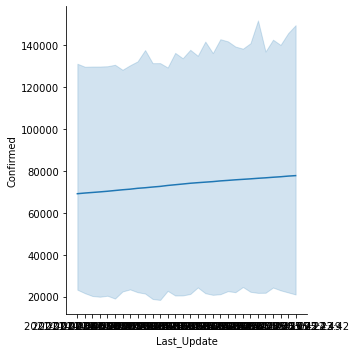

In [9]:
sns.relplot(x="Last_Update", y="Confirmed", data=df,  kind='line')

### Take Data for Balochistan
Here we have different number of cases for same date because wo have data for different Province.
Let's just take the data for Balochistan

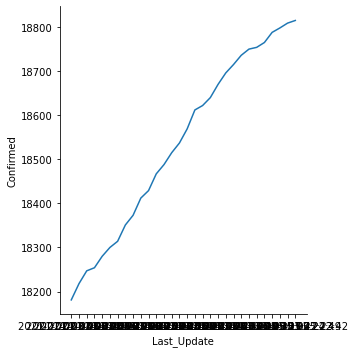

In [10]:
indices = df[df['Province_State'] == 'Balochistan'].index
balochistan_df = df.iloc[indices]
sns.relplot(x="Last_Update", y="Confirmed", data=balochistan_df,  kind='line')

### The x-axis is not visible
Because of long date values at x-axis are not visible so let's increase the size of the graph

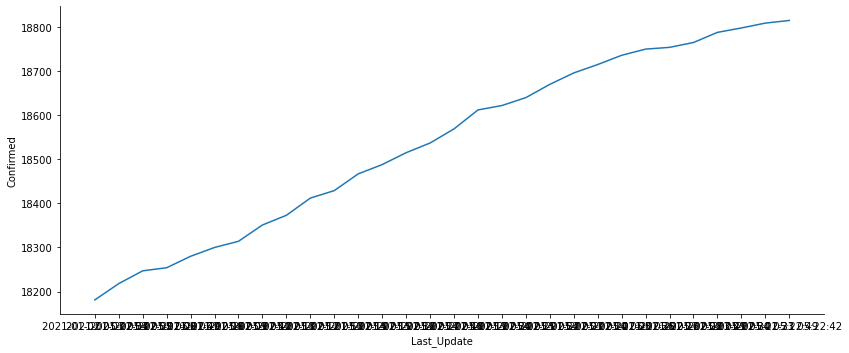

In [11]:
sns.relplot( aspect=19/8, x="Last_Update", y="Confirmed", data=balochistan_df,  kind='line')

### Still it's not visible so let's just add one more column for x axis 
Add a columns for days only for the x axis.

In [12]:
balochistan_df.reset_index(drop=True,inplace=True) 
ser_date = balochistan_df.loc[:,'Last_Update']
days = []
for date in ser_date:
    day = pd.to_datetime(date).day
    days.append(day)
balochistan_df.loc[:,'days'] = days
balochistan_df

C:\Users\Pavilion14x360\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,days
0,Balochistan,2021-01-02 05:22:33,18181,184,17752,245,147.281263,1.012046,2
1,Balochistan,2021-01-03 05:22:52,18218,185,17760,273,147.580994,1.015479,3
2,Balochistan,2021-01-04 05:22:02,18247,185,17812,250,147.815918,1.013865,4
3,Balochistan,2021-01-05 05:21:49,18254,185,17829,240,147.872624,1.013476,5
4,Balochistan,2021-01-06 05:22:16,18280,186,17857,237,148.083245,1.017505,6
5,Balochistan,2021-01-07 05:22:03,18300,186,17883,231,148.245262,1.016393,7
6,Balochistan,2021-01-08 05:22:42,18314,186,17893,235,148.358674,1.015616,8
7,Balochistan,2021-01-09 05:22:18,18351,187,17898,266,148.658405,1.019018,9
8,Balochistan,2021-01-10 05:22:12,18373,188,17899,286,148.836623,1.023241,10
9,Balochistan,2021-01-11 05:21:50,18412,188,17938,286,149.152556,1.021073,11


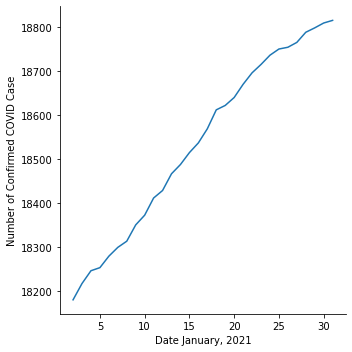

In [13]:
g = sns.relplot(x="days", y="Confirmed", data=balochistan_df,  kind='line')
g = g.set_axis_labels("Date January, 2021","Number of Confirmed COVID Case")


### Cases Reported vs Recovered

Text(0, 0.5, 'Number of COVID Case')

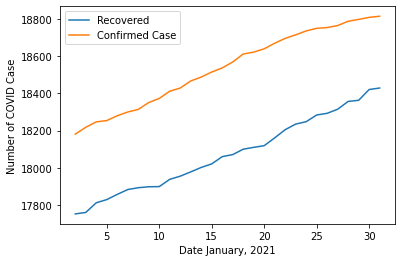

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(balochistan_df.days.tolist(), balochistan_df.Recovered.tolist(), label='Recovered')
ax.plot(balochistan_df.days, balochistan_df.Confirmed.tolist(), label='Confirmed Case')
plt.legend(loc='best')
ax.set_xlabel("Date January, 2021")
ax.set_ylabel("Number of COVID Case")

### Create the data Frame for Punjab

In [15]:
indices = df[df['Province_State'] == 'Punjab'].index
punjab_df = df.iloc[indices]
punjab_df
punjab_df.reset_index(drop=True,inplace=True) 
ser_date = punjab_df.loc[:,'Last_Update']
days = []
for date in ser_date:
    day = pd.to_datetime(date).day
    days.append(day)
punjab_df.loc[:,'days'] = days
punjab_df
df_1 = pd.melt(punjab_df, id_vars="days", value_vars=["Confirmed","Recovered"], var_name="case_status", value_name="no_of_cases")
df_1

C:\Users\Pavilion14x360\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,days,case_status,no_of_cases
0,2,Confirmed,139341
1,3,Confirmed,140188
2,4,Confirmed,140714
3,5,Confirmed,141393
4,6,Confirmed,142058
5,7,Confirmed,142835
6,8,Confirmed,143511
7,9,Confirmed,144111
8,10,Confirmed,144909
9,11,Confirmed,145508


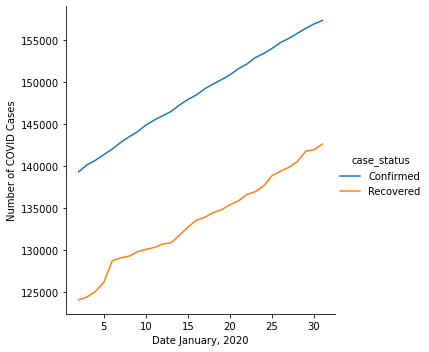

In [16]:
g = sns.relplot(x="days", y="no_of_cases", data=df_1,  kind='line', hue="case_status")
g = g.set_axis_labels("Date January, 2020","Number of COVID Cases")

 <img   src="images/plotly1.png"> 

### Plotly
Plotly allows you to create over 40 beautiful <b>interactive</b> web-based visualizations that can be displayed in Jupyter notebooks or saved to HTML files. It is widely used to plot scientific, statistical and financial data. Plotly is free to use unless you want them to host your data for you.

 <img width=80%  src="images/plotly2.png"> 


In [19]:
# To make Plotly work in Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Use Plotly to create a line graph
We are using Balochistan's Data Set to create a simple line graph

In [20]:
px.line(balochistan_df, x="days",y=["Recovered","Confirmed"],title='Cases Reported Vs Recovered')

### We are compairing the data of different Province
we are compairing the data between 
1. Azad Jammu and Kashmir
2. Balochistan
3. Gilgit-Baltistan

In [21]:
indices = df[df['Province_State'] == 'Azad Jammu and Kashmir'].index
df_2 = df.iloc[indices]

indices = df[df['Province_State'] == 'Balochistan'].index
temp_df = df.iloc[indices]
df_2 = pd.concat([temp_df, df_2], axis=0)

indices = df[df['Province_State'] == 'Gilgit-Baltistan'].index
temp_df = df.iloc[indices]
df_2 = pd.concat([temp_df, df_2],axis=0)
df_2.reset_index(drop=True,inplace=True) 
df_2.rename(columns={'Province_State':'Province','Last_Update':'Date'}, inplace=True)
df_2

,Province,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Gilgit-Baltistan,2021-01-02 05:22:33,4862,101,4713,48,479.683973,2.077334
1,Gilgit-Baltistan,2021-01-03 05:22:52,4866,101,4716,49,480.078612,2.075627
2,Gilgit-Baltistan,2021-01-04 05:22:02,4867,101,4716,50,480.177272,2.075200
3,Gilgit-Baltistan,2021-01-05 05:21:49,4870,101,4717,52,480.473251,2.073922
4,Gilgit-Baltistan,2021-01-06 05:22:16,4873,101,4717,55,480.769231,2.072645
...,...,...,...,...,...,...,...,...
85,Azad Jammu and Kashmir,2021-01-27 05:23:41,8877,258,8297,322,219.436264,2.906387
86,Azad Jammu and Kashmir,2021-01-28 05:22:24,8931,259,8317,355,220.771124,2.900011
87,Azad Jammu and Kashmir,2021-01-29 05:22:23,8953,259,8335,359,221.314956,2.892885
88,Azad Jammu and Kashmir,2021-01-30 05:22:49,8972,259,8354,359,221.784630,2.886759


In [22]:
fig = px.line(df_2, x="Date", y=["Confirmed","Recovered"], line_group="Province" ,title='Cases Reported Vs Recovered')
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Cases',legend_title="Case Status")
fig.show()

### Represent the same above data in Scatter Graph 

In [23]:
fig = px.scatter(df_2, x='Date', y=["Confirmed","Recovered"], facet_col='Province', title='Cases Reported Vs Recovered')
fig.update_layout( yaxis_title='Number of Cases',legend_title="Case Status")
fig.show()

### Servival Ratio of different Province of Pakistan

In [24]:
df.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Azad Jammu and Kashmir,2021-01-02 05:22:33,8303,224,7691,388,205.247189,2.697820
1,Balochistan,2021-01-02 05:22:33,18181,184,17752,245,147.281263,1.012046
2,Gilgit-Baltistan,2021-01-02 05:22:33,4862,101,4713,48,479.683973,2.077334
3,Islamabad,2021-01-02 05:22:33,38020,421,34617,2982,1894.773773,1.107312
4,Khyber Pakhtunkhwa,2021-01-02 05:22:33,59023,1661,53942,3420,193.369861,2.814157


In [25]:
confirmed_cases = df.loc[:,"Confirmed"]
recovered = df.loc[:,"Recovered"]
df['servival_ratio'] = (df['Recovered'] / 
                  df['Confirmed']) * 100
df.rename(columns={'Province_State':'Province','Last_Update':'Date'}, inplace=True)
df


,Province,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,servival_ratio
0,Azad Jammu and Kashmir,2021-01-02 05:22:33,8303,224,7691,388,205.247189,2.697820,92.629170
1,Balochistan,2021-01-02 05:22:33,18181,184,17752,245,147.281263,1.012046,97.640394
2,Gilgit-Baltistan,2021-01-02 05:22:33,4862,101,4713,48,479.683973,2.077334,96.935418
3,Islamabad,2021-01-02 05:22:33,38020,421,34617,2982,1894.773773,1.107312,91.049448
4,Khyber Pakhtunkhwa,2021-01-02 05:22:33,59023,1661,53942,3420,193.369861,2.814157,91.391491
...,...,...,...,...,...,...,...,...,...
205,Gilgit-Baltistan,2021-01-31 05:22:42,4908,102,4787,19,484.222324,2.078240,97.534637
206,Islamabad,2021-01-31 05:22:42,41359,475,39439,1445,2061.176972,1.148480,95.357721
207,Khyber Pakhtunkhwa,2021-01-31 05:22:42,66953,1897,62198,2858,219.349953,2.833331,92.898003
208,Punjab,2021-01-31 05:22:42,157353,4736,142651,9966,143.032004,3.009793,90.656676


In [26]:
df2 = df.pivot_table(columns='Province', index='Date',values='servival_ratio')
df2.head()

Province,Azad Jammu and Kashmir,Balochistan,Gilgit-Baltistan,Islamabad,Khyber Pakhtunkhwa,Punjab,Sindh
Date,,,,,,,
2021-01-02 05:22:33,92.629170,97.640394,96.935418,91.049448,91.391491,89.080027,90.537871
2021-01-03 05:22:52,92.768769,97.486003,96.917386,91.595449,91.777909,88.781493,90.369700
2021-01-04 05:22:02,92.832356,97.616046,96.897473,91.715234,91.653218,88.924343,90.316884
2021-01-05 05:21:49,93.021591,97.671743,96.858316,91.816643,91.526729,89.272453,90.165503
2021-01-06 05:22:16,93.294426,97.685996,96.798687,92.416496,91.777166,90.649594,90.057188


The scatter trace type encompasses line charts, scatter charts, text charts, and bubble charts. The data visualized as scatter point or lines is set in x and y. 

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df2.index, y=df2["Azad Jammu and Kashmir"], 
                        mode='lines', name='Azad Jammu and Kashmir'))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Balochistan"], 
                        mode='lines+markers', name='Balochistan'))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Gilgit-Baltistan"], 
                        mode='lines+markers', name='Gilgit-Baltistan',
                        line=dict(color='firebrick', width=2, dash='dashdot')))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Islamabad"], 
                        mode='lines', name='Islamabad',
                        line=dict(width=2, dash='dashdot')))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Khyber Pakhtunkhwa"], 
                        mode='lines+markers', name='Khyber Pakhtunkhwa'))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Punjab"], 
                        mode='lines+markers', name='Punjab'))
fig.add_trace(go.Scatter(x=df2.index, y=df2["Sindh"], 
                        mode='lines+markers', name='Sindh'))
fig.update_layout( yaxis_title='Servival Ratio During Pendamic in Pakistan',legend_title="Privvince of Pakistan")

In [28]:
df = pd.read_csv('dataset/01-01-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,NaN,NaN,NaN,Tonga,2021-01-02 05:22:33,-21.179000,-175.198200,0,0,0,0,Tonga,0.000000,NaN
4001,NaN,NaN,NaN,Winter Olympics 2022,2021-01-02 05:22:33,39.904200,116.407400,0,0,0,0,Winter Olympics 2022,0.000000,0.000000
4002,NaN,NaN,NaN,Antarctica,2021-01-02 05:22:33,-71.949900,23.347000,0,0,0,0,Antarctica,0.000000,0.000000
4003,NaN,NaN,Jersey,United Kingdom,2021-01-02 05:22:33,49.213800,-2.135800,2739,42,0,0,"Jersey, United Kingdom",0.000000,0.000000


### Create a Geo Scatter Graph to Show the COVID Cases on the Glob

In [29]:
fig = px.scatter_geo(df,
                     lat="Lat", lon="Long_",
                     color="Confirmed",
                     hover_name="Country_Region",
                     projection="orthographic")
fig.update_layout(
    title="Number of COVID Cases on 1st January, 2021"
)
fig

### Create a Linear Regrassion ML Model
We are using Linear Regression because our dependent variable is linear in nature


In [30]:
df = pd.read_csv('dataset/01-01-2021.csv')
indices = df[df['Country_Region'] == 'Pakistan'].index
df = df.iloc[indices]
for i in range(2,31):    
    temp_df = pd.read_csv("dataset/01-{}-2021.csv".format(i))
    df = df.append(temp_df, ignore_index=True)
    indices = df[df['Country_Region'] == 'Pakistan'].index
    df = df.iloc[indices]
df.reset_index(drop=True,inplace=True) 
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,Azad Jammu and Kashmir,Pakistan,2021-01-02 05:22:33,34.027401,73.947253,8303,224,7691,388,"Azad Jammu and Kashmir, Pakistan",205.247189,2.697820
1,NaN,NaN,Balochistan,Pakistan,2021-01-02 05:22:33,28.328492,65.898403,18181,184,17752,245,"Balochistan, Pakistan",147.281263,1.012046
2,NaN,NaN,Gilgit-Baltistan,Pakistan,2021-01-02 05:22:33,35.792146,74.982138,4862,101,4713,48,"Gilgit-Baltistan, Pakistan",479.683973,2.077334
3,NaN,NaN,Islamabad,Pakistan,2021-01-02 05:22:33,33.665087,73.121219,38020,421,34617,2982,"Islamabad, Pakistan",1894.773773,1.107312
4,NaN,NaN,Khyber Pakhtunkhwa,Pakistan,2021-01-02 05:22:33,34.485332,72.091690,59023,1661,53942,3420,"Khyber Pakhtunkhwa, Pakistan",193.369861,2.814157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,Gilgit-Baltistan,Pakistan,2021-01-31 05:22:42,35.792146,74.982138,4908,102,4787,19,"Gilgit-Baltistan, Pakistan",484.222324,2.078240
206,NaN,NaN,Islamabad,Pakistan,2021-01-31 05:22:42,33.665087,73.121219,41359,475,39439,1445,"Islamabad, Pakistan",2061.176972,1.148480
207,NaN,NaN,Khyber Pakhtunkhwa,Pakistan,2021-01-31 05:22:42,34.485332,72.091690,66953,1897,62198,2858,"Khyber Pakhtunkhwa, Pakistan",219.349953,2.833331
208,NaN,NaN,Punjab,Pakistan,2021-01-31 05:22:42,30.811346,72.139132,157353,4736,142651,9966,"Punjab, Pakistan",143.032004,3.009793


In [31]:
df.drop(columns=['FIPS', 'Admin2', 'Combined_Key','Lat','Long_','Country_Region',
                'Deaths','Recovered','Active','Incident_Rate','Case_Fatality_Ratio']
        , axis=1,inplace = True)
df.head()

,Province_State,Last_Update,Confirmed
0,Azad Jammu and Kashmir,2021-01-02 05:22:33,8303
1,Balochistan,2021-01-02 05:22:33,18181
2,Gilgit-Baltistan,2021-01-02 05:22:33,4862
3,Islamabad,2021-01-02 05:22:33,38020
4,Khyber Pakhtunkhwa,2021-01-02 05:22:33,59023


In [32]:
df1  = df.pivot_table(index='Province_State', columns='Last_Update')
df1

Confirmed                      \
Last_Update            2021-01-02 05:22:33 2021-01-03 05:22:52   
Province_State                                                   
Azad Jammu and Kashmir                8303                8325   
Balochistan                          18181               18218   
Gilgit-Baltistan                      4862                4866   
Islamabad                            38020               38146   
Khyber Pakhtunkhwa                   59023               59255   
Punjab                              139341              140188   
Sindh                               216632              217636   

                                                                \
Last_Update            2021-01-04 05:22:02 2021-01-05 05:21:49   
Province_State                                                   
Azad Jammu and Kashmir                8357                8383   
Balochistan                          18247               18254   
Gilgit-Baltistan                      4867                4870   
Islamabad                            38263               38395   
Khyber Pakhtunkhwa                   59484               59729   
Punjab                              140714              141393   
Sindh                               218597              219452   

                                                                \
Last_Update            2021-01-06 05:22:16 2021-01-07 05:22:03   
Province_State                                                   
Azad Jammu and Kashmir                8396                8416   
Balochistan                          18280               18300   
Gilgit-Baltistan                      4873                4874   
Islamabad                            38531               38687   
Khyber Pakhtunkhwa                   59955               60229   
Punjab                              142058              142835   
Sindh                               220501              221734   

                                                                \
Last_Update            2021-01-08 05:22:42 2021-01-09 05:22:18   
Province_State                                                   
Azad Jammu and Kashmir                8430                8451   
Balochistan                          18314               18351   
Gilgit-Baltistan                      4878                4879   
Islamabad                            38842               38970   
Khyber Pakhtunkhwa                   60536               60751   
Punjab                              143511              144111   
Sindh                               222999              224004   

                                                                ...  \
Last_Update            2021-01-10 05:22:12 2021-01-11 05:21:50  ...   
Province_State                                                  ...   
Azad Jammu and Kashmir                8478                8489  ...   
Balochistan                          18373               18412  ...   
Gilgit-Baltistan                      4879                4880  ...   
Islamabad                            39120               39242  ...   
Khyber Pakhtunkhwa                   61148               61424  ...   
Punjab                              144909              145508  ...   
Sindh                               225509              226338  ...   

                                                                \
Last_Update            2021-01-22 05:22:10 2021-01-23 05:22:03   
Province_State                                                   
Azad Jammu and Kashmir                8753                8770   
Balochistan                          18696               18715   
Gilgit-Baltistan                      4899                4899   
Islamabad                            40548               40629   
Khyber Pakhtunkhwa                   64651               64945   
Punjab                              152158              152925   
Sindh                               239186              239935   

                 

In [33]:
list_sum = []
list_index = []
for i in df1.columns:
    list_sum.append(df1[i].sum())
    list_index.append(i[1])
sum = pd.Series(list_sum)
date = pd.Series(list_index)
sum.name = "Total Number of Cases"
date.name = "date"
list_of_series = [sum,date]
df2 = pd.DataFrame(sum)
df2["Date"] = date
df2

,Total Number of Cases,Date
0,484362,2021-01-02 05:22:33
1,486634,2021-01-03 05:22:52
2,488529,2021-01-04 05:22:02
3,490476,2021-01-05 05:21:49
4,492594,2021-01-06 05:22:16
5,495075,2021-01-07 05:22:03
6,497510,2021-01-08 05:22:42
7,499517,2021-01-09 05:22:18
8,502416,2021-01-10 05:22:12
9,504293,2021-01-11 05:21:50


### Creating a graph for total number of COVID cases in Pakistan 

In [34]:
px.line(df2, x="Date",y="Total Number of Cases",title='Total COVID Cases in Pakistan')

In [35]:
df2.reset_index(drop=True,inplace=True) 
ser_date = df2.loc[:,'Date']
days = []
for date in ser_date:
    day = pd.to_datetime(date).day
    days.append(day)
df2.loc[:,'days'] = days
df2

,Total Number of Cases,Date,days
0,484362,2021-01-02 05:22:33,2
1,486634,2021-01-03 05:22:52,3
2,488529,2021-01-04 05:22:02,4
3,490476,2021-01-05 05:21:49,5
4,492594,2021-01-06 05:22:16,6
5,495075,2021-01-07 05:22:03,7
6,497510,2021-01-08 05:22:42,8
7,499517,2021-01-09 05:22:18,9
8,502416,2021-01-10 05:22:12,10
9,504293,2021-01-11 05:21:50,11



<img align="center" width="350" height="350"  src="images/sklearn.png"> 
<dir>
Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering 
    </dir>

In [36]:
#pip install -U scikit-learn
from sklearn import linear_model

### Training of Model
We are training the Model using 70% of the data

In [37]:
training_data = df2[:20]

In [38]:
model = linear_model.LinearRegression()
y = np.array(training_data["Total Number of Cases"]).reshape(-1, 1)
x = np.array(training_data['days']).reshape(-1, 1)
model.fit(x,y)

LinearRegression()

In [39]:
accuracy = model.score(x,y)
round(accuracy*100,3)

99.892

In [40]:
y_new = model.predict(x)
training_data["predicted_values"] = y_new
fig = go.Figure()

fig = go.Figure()
fig.add_trace(go.Scatter(x=training_data["Date"], y=training_data["Total Number of Cases"],
                        mode='lines', name='Orignal Values'))
fig.add_trace(go.Scatter(x=training_data["Date"], y=training_data["predicted_values"],
                        mode='lines+markers', name='Predicted Values'))

C:\Users\PAVILI~1\AppData\Local\Temp/ipykernel_20616/3715724832.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Testing of Model
We are testing the Model using remaining 30% of the data

In [41]:
test_data = df2[20:]
test_data

,Total Number of Cases,Date,days
20,528891,2021-01-22 05:22:10,22
21,530818,2021-01-23 05:22:03,23
22,532412,2021-01-24 05:22:35,24
23,534041,2021-01-25 05:22:16,25
24,535914,2021-01-26 05:22:02,26
25,537477,2021-01-27 05:23:41,27
26,539387,2021-01-28 05:22:24,28
27,541031,2021-01-29 05:22:23,29
28,543214,2021-01-30 05:22:49,30
29,544813,2021-01-31 05:22:42,31


In [42]:
y_new = model.predict(np.arange(20,30).reshape(-1,1))
test_data["predicted_values"] = y_new

C:\Users\PAVILI~1\AppData\Local\Temp/ipykernel_20616/3314964081.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:

fig = go.Figure()

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_data["Date"], y=test_data["Total Number of Cases"],
                        mode='lines', name='Orignal Values'))
fig.add_trace(go.Scatter(x=test_data["Date"], y=test_data["predicted_values"],
                        mode='lines+markers', name='Predicted Values'))

<div style="width: 90%;
height: 50px;
border-top: 4px solid black;
position: absolute;">
</div>

<div></div>

<div style="text-align: center;font-family: Arial, Helvetica, sans-serif; font-size: 35px;">
THE END
</div>

<div></div>

<div style="width: 90%;
height: 50px;
border-top: 4px solid black;
position: absolute;">
</div>